In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#cls_data = ['compas', "income", "iris", "diabetes", 'breast_cancer',"nursery", "mushroom"]
cls_data =['breast_cancer', 'compas', 'diabetes', 'income', 'iris']
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

for data in cls_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    #df = df.sort_values("Method", ascending=False)
    print(df.groupby(["Method", "Model"]).agg({'MAPE Correctness': ["mean", "std"]}).round(4))
    print(df.groupby(["Method", "Model"]).agg({'RMSE Correctness': ["mean", "std"]}).round(4))
    print(df.groupby(["Method", "Model"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

    

    print("-----------------%s-----------------" %(data))
# #     for method in perm_methods:
#     #rint(method)
#     fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#     sns.boxplot(data=df, hue="Model", y="MAPE Correctness", x="Method", ax=ax[0])
#     ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
#     ax[0].get_legend().remove()
#     ax[0].set_ylim(-1.05, 1.05)
    
#     sns.boxplot(data=df, hue="Model", y="RMSE Correctness", x="Method", ax=ax[1])
#     ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
#     ax[1].get_legend().remove()
#     ax[1].set_ylim(-1.05, 1.05)

#     sns.boxplot(data=df, hue="Model", y="R2 Correctness", x="Method", ax=ax[2])
#     ax[2].set_ylim(-1.05, 1.05)
#     ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
#     ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
#     fig.tight_layout()
#     plt.show()

                            MAPE Correctness        
                                        mean     std
Method        Model                                 
baseline_0    decision_tree           0.7118  0.1613
              logit                   0.5010  0.1255
              nb                      0.0983  0.2752
baseline_max  decision_tree           0.7044  0.1072
              logit                   0.5416  0.1959
              nb                      0.3662  0.2686
baseline_mean decision_tree           0.6276  0.1181
              logit                   0.5299  0.1058
              nb                      0.7206  0.1370
baseline_min  decision_tree           0.7118  0.1613
              logit                   0.5020  0.1226
              nb                      0.1117  0.2679
permutation   decision_tree           0.7923  0.1296
              logit                   0.6548  0.0818
              nb                      0.4514  0.1889
                            RMSE Correctness  

-----------------compas-----------------


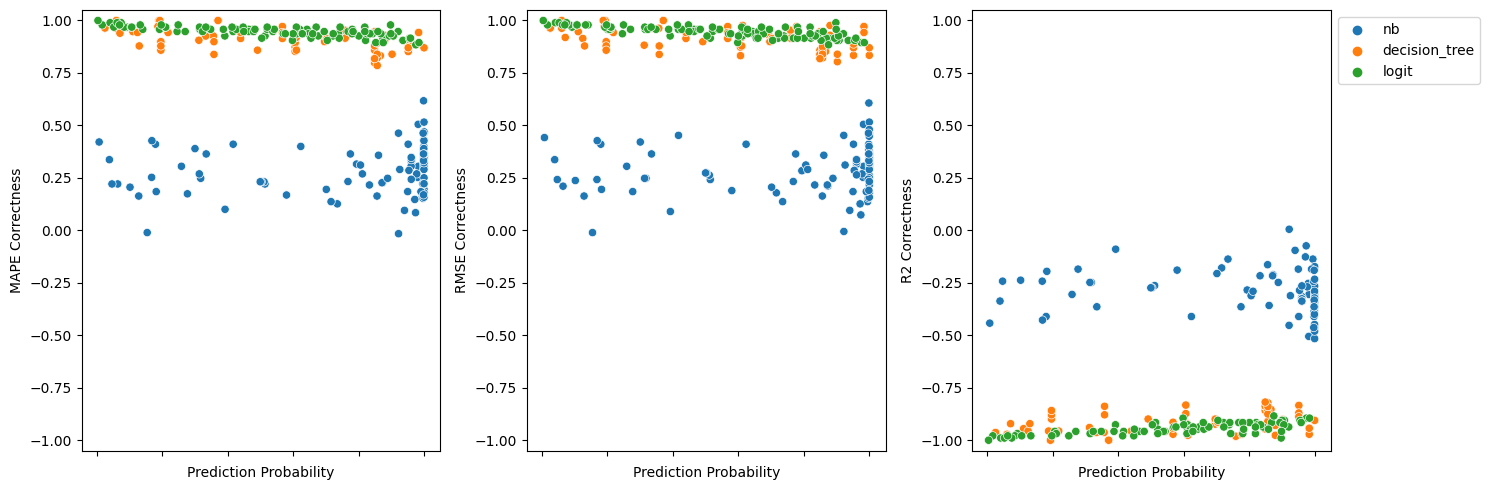

-----------------income-----------------


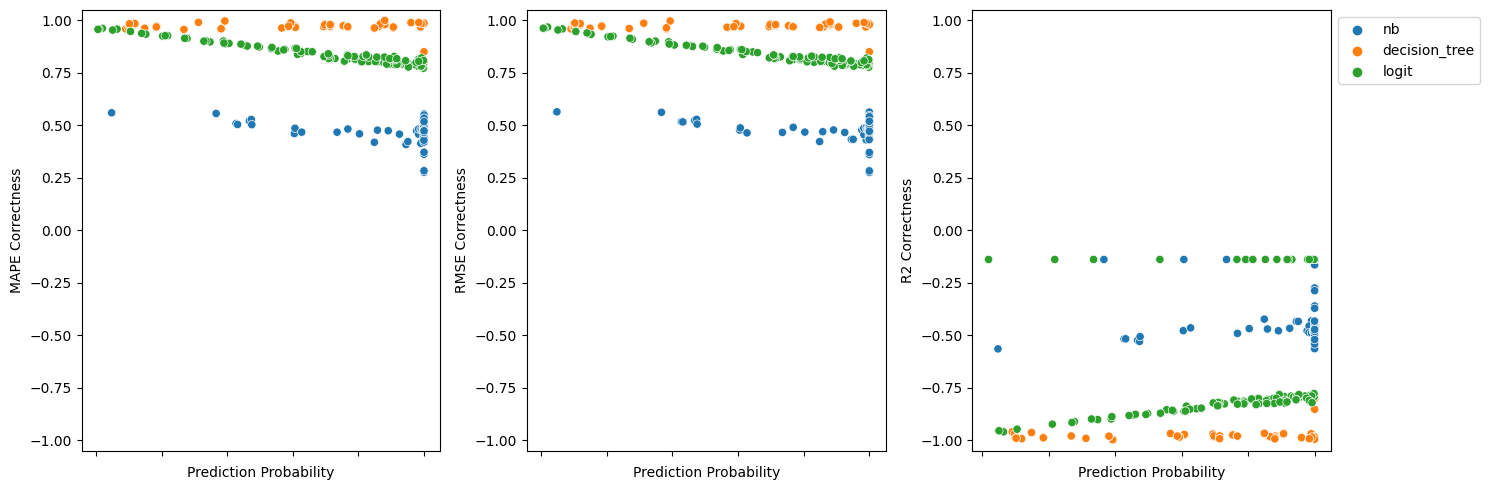

-----------------iris-----------------


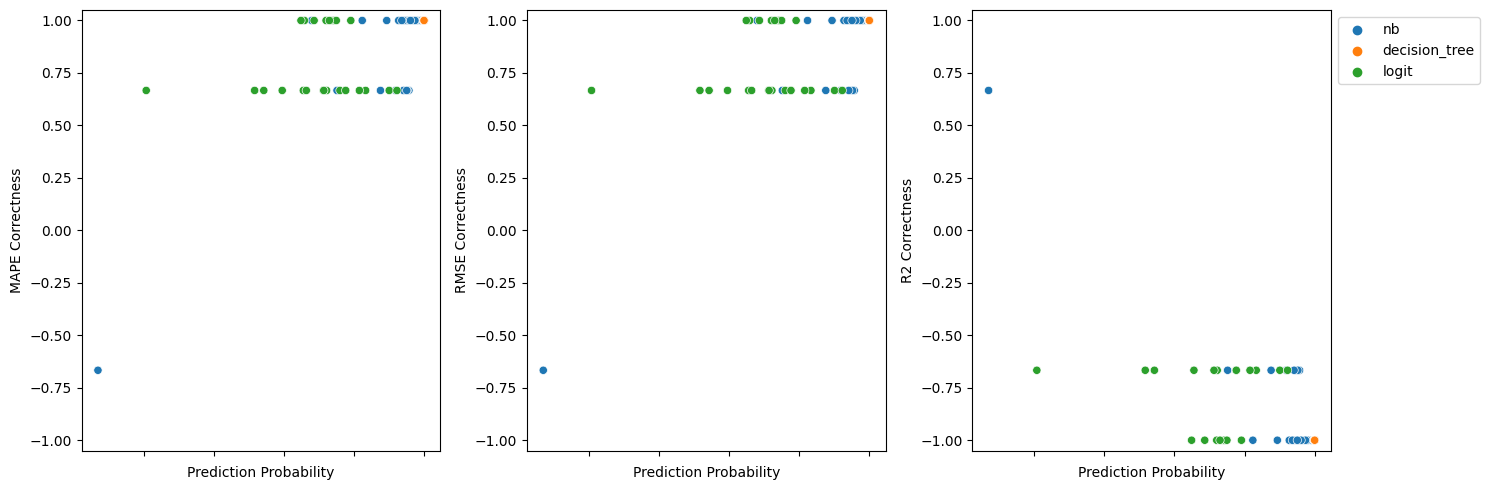

-----------------diabetes-----------------


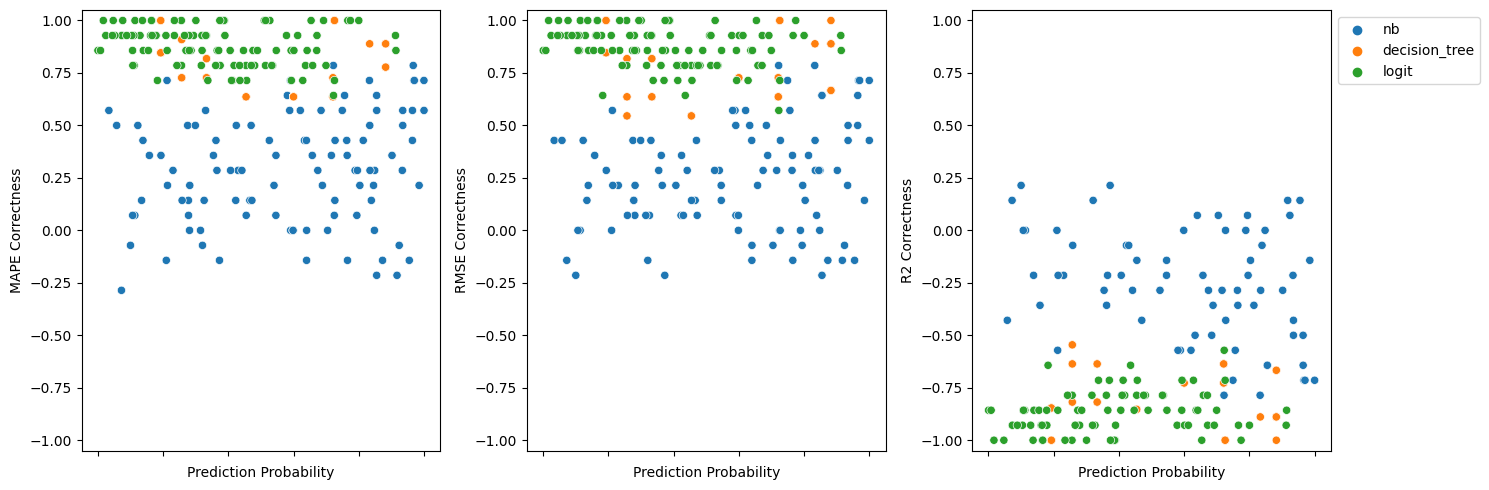

-----------------breast_cancer-----------------


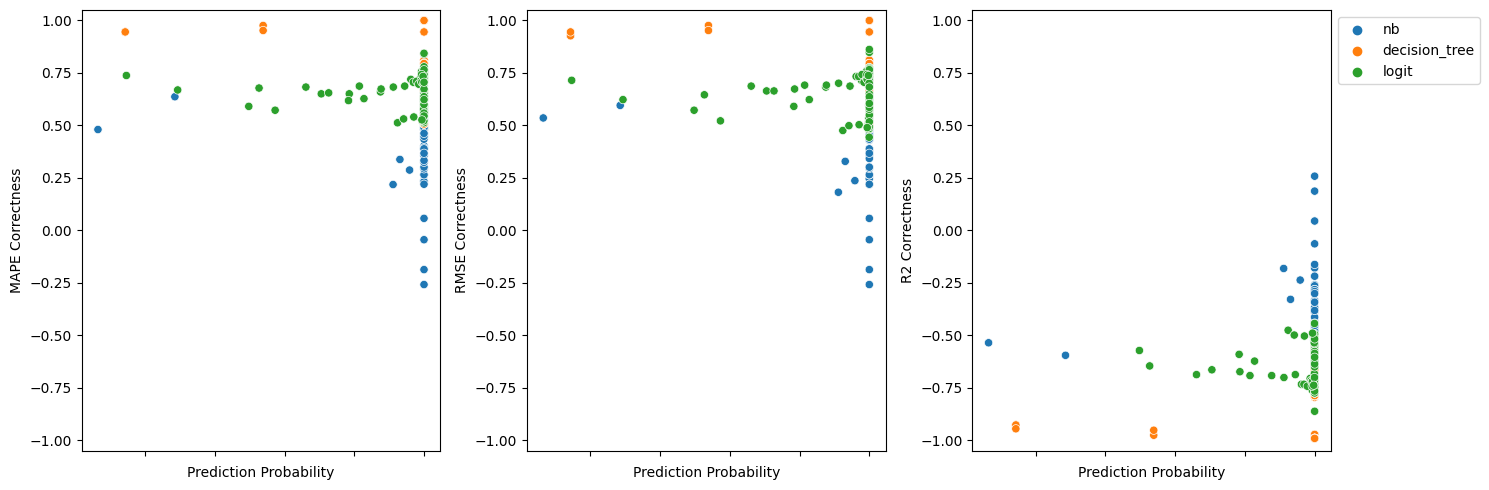

FileNotFoundError: [Errno 2] No such file or directory: 'nursery\\logit\\permutation_results.csv'

In [3]:
cls_data = ['compas', "income", "iris", "diabetes", 'breast_cancer',"nursery", "mushroom"]
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

for data in cls_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    #df = df.sort_values("Method", ascending=False)
#     print(df.groupby(["Method", "Model"]).agg({'MAPE Correctness': ["mean", "std"]}).round(4))
#     print(df.groupby(["Method", "Model"]).agg({'RMSE Correctness': ["mean", "std"]}).round(4))
#     print(df.groupby(["Method", "Model"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

    

    print("-----------------%s-----------------" %(data))
# #     for method in perm_methods:
#     #rint(method)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="MAPE Correctness", x="Prediction Probability", ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
    ax[0].get_legend().remove()
    ax[0].set_ylim(-1.05, 1.05)
    
    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="RMSE Correctness", x="Prediction Probability", ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
    ax[1].get_legend().remove()
    ax[1].set_ylim(-1.05, 1.05)

    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="R2 Correctness", x="Prediction Probability", ax=ax[2])
    ax[2].set_ylim(-1.05, 1.05)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
    ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
    fig.tight_layout()
    plt.show()

In [ ]:
df

In [62]:
#cls_data = ['compas', "income", "iris", "diabetes", 'breast_cancer',"nursery", "mushroom"]
cls_data =['bpic2012', 'production', 'sepsis_cases']
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

#num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s/%s/pipelines'% 
#                                                                    (dataset_ref, cls_method, method_name)))])
df = pd.DataFrame()
for data in cls_data:
    for model in models:
        model_df = pd.DataFrame()
        for preproc in preprocs:
            num_buckets = len([name for name in os.listdir(os.path.join('%s/%s/%s/pipelines'% 
                                                                    (data, model, preproc)))])
            for bucket in range(1, num_buckets+1):
                for method in perm_methods:
                    csv = pd.read_csv(os.path.join(data, model, preproc, "samples/%s_results_bucket_%s.csv" 
                                                   %(method,bucket)), sep=";")
                    #csv["Method"] = method
                    csv["Pre-processing"] = preproc
                    csv["bucket"] = bucket
                    model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        model_df["Data"] = data
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
        #print(df.shape)

#df = df.sort_values("Method", ascending=False)
for index, group in df.groupby("Data"):
    print(index)
    print(group.groupby(["Mode", "Model", "Pre-processing"]).agg({'MAPE Correctness': ["mean", "std"]}).round(4))
    print(group.groupby(["Mode", "Model", "Pre-processing"]).agg({'RMSE Correctness': ["mean", "std"]}).round(4))
    print(group.groupby(["Mode", "Model", "Pre-processing"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

    

#print("-----------------%s-----------------" %(data))
# #     for method in perm_methods:
#     #rint(method)
#     fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#     sns.boxplot(data=df, hue="Model", y="MAPE Correctness", x="Method", ax=ax[0])
#     ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
#     ax[0].get_legend().remove()
#     ax[0].set_ylim(-1.05, 1.05)
    
#     sns.boxplot(data=df, hue="Model", y="RMSE Correctness", x="Method", ax=ax[1])
#     ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
#     ax[1].get_legend().remove()
#     ax[1].set_ylim(-1.05, 1.05)

#     sns.boxplot(data=df, hue="Model", y="R2 Correctness", x="Method", ax=ax[2])
#     ax[2].set_ylim(-1.05, 1.05)
#     ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
#     ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
#     fig.tight_layout()
#     plt.show()

bpic2012
                                           MAPE Correctness        
                                                       mean     std
Mode          Model         Pre-processing                         
baseline_0    decision_tree prefix_agg               0.6793  0.2504
                            prefix_index             0.8266  0.1393
                            single_agg               1.0000  0.0000
              logit         prefix_agg               0.0871  0.3433
                            prefix_index             0.1660  0.3911
                            single_agg              -0.2037  0.0411
              nb            prefix_agg               0.1660  0.2547
                            prefix_index             0.0911  0.2714
                            single_agg               0.1494  0.0802
baseline_max  decision_tree prefix_agg               0.8614  0.1188
                            prefix_index             0.8049  0.1898
                            single_agg 

bpic2012


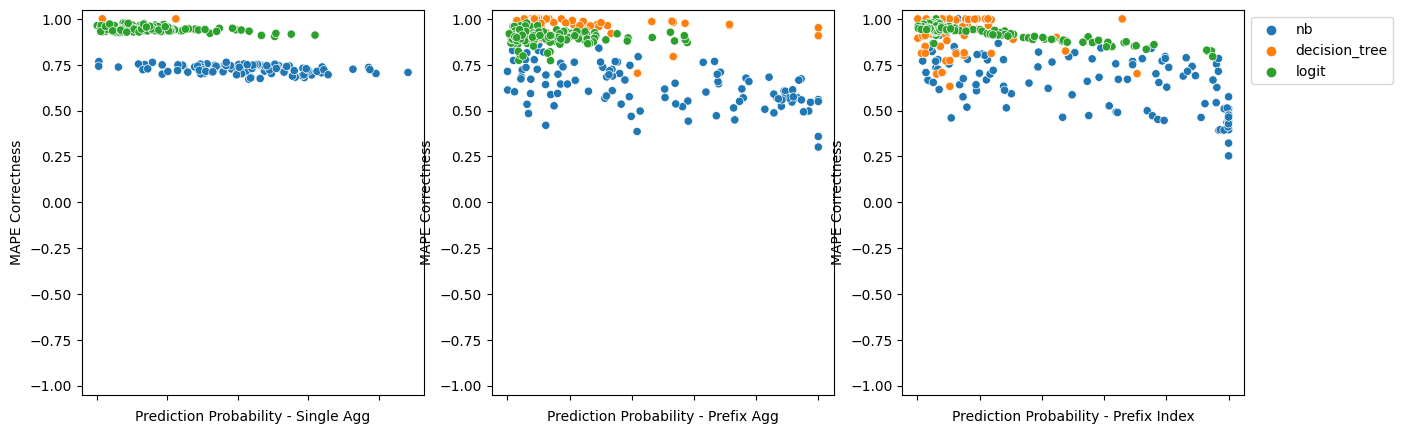

production


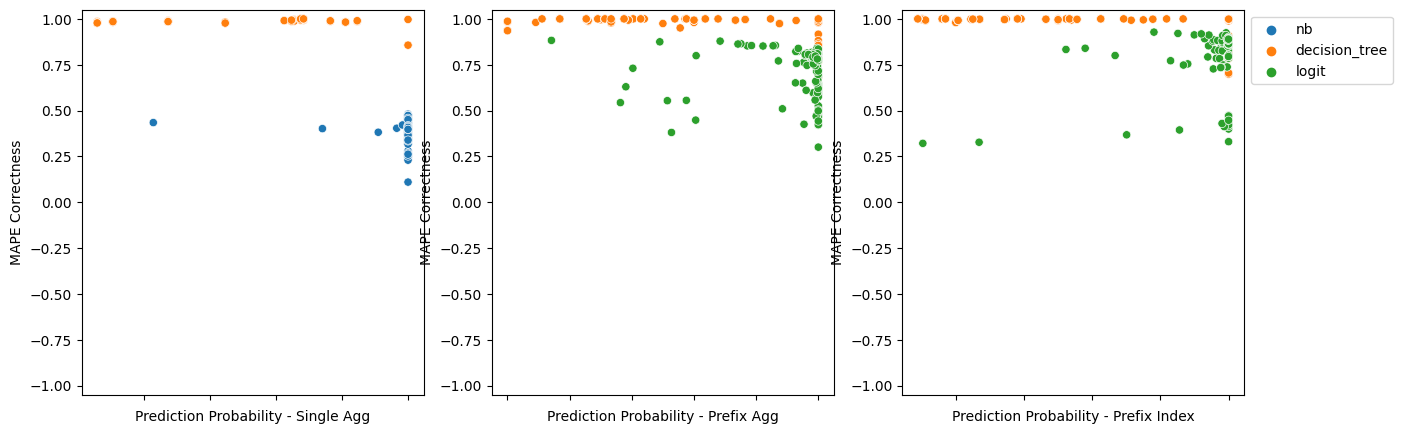

sepsis_cases


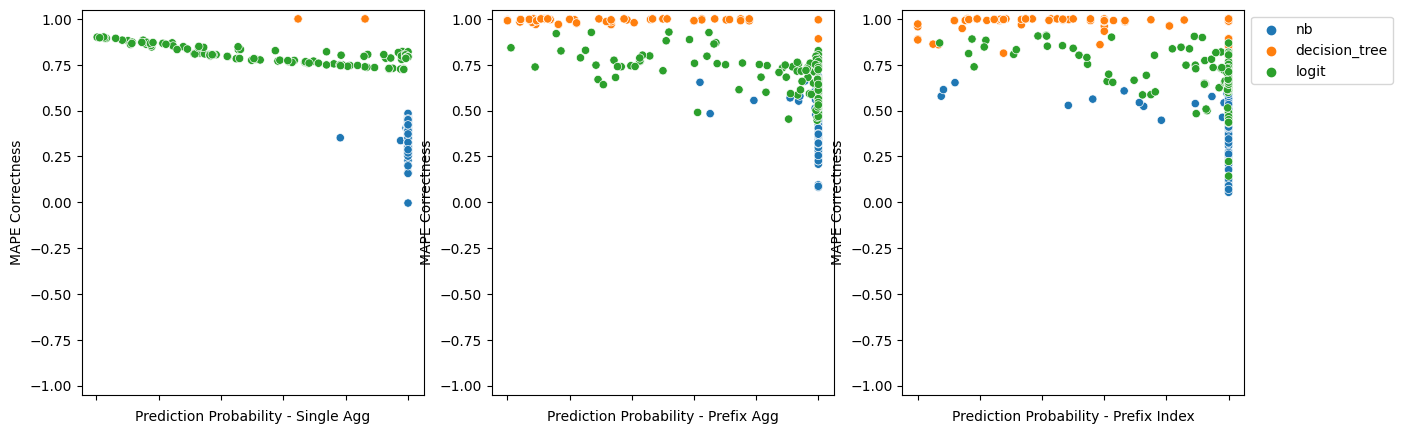

In [63]:
groups = df.groupby(["Data"])

for index, group in groups:
    print(index)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.scatterplot(data=group[(group["Mode"]=="permutation") & (group["Pre-processing"]=="single_agg")], 
                    hue="Model", y="MAPE Correctness", x="Prediction Probability", ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
    ax[0].get_legend().remove()
    ax[0].set_ylim(-1.05, 1.05)
    ax[0].set_xlabel("Prediction Probability - Single Agg")
    
    sns.scatterplot(data=group[(group["Mode"]=="permutation") & (group["Pre-processing"]=="prefix_agg")], 
                    hue="Model", y="MAPE Correctness", x="Prediction Probability", ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
    ax[1].get_legend().remove()
    ax[1].set_ylim(-1.05, 1.05)
    ax[1].set_xlabel("Prediction Probability - Prefix Agg")

    
    sns.scatterplot(data=group[(group["Mode"]=="permutation") & (group["Pre-processing"]=="prefix_index")], 
                    hue="Model", y="MAPE Correctness", x="Prediction Probability", ax=ax[2])
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
    ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax[2].set_ylim(-1.05, 1.05)
    ax[2].set_xlabel("Prediction Probability - Prefix Index")

    
    
    plt.show()

In [60]:
df

,Case ID,Actual,Prefix Length,Prediction,Prediction Probability,SHAP Subset Stability,SHAP Weight Stability,SHAP Adjusted Weight Stability,LIME Subset Stability,LIME Weight Stability,...,RMSE Correctness,R2 Correctness,Mode,Pre-processing,bucket,LIME Subset Stability.1,LIME Weight Stability.1,LIME Adjusted Weight Stability.1,Model,Data
0,ADA_11,1.0,11.0,1.0,1.000000,1.000000,0.986643,0.986643,0.942754,0.957324,...,0.428181,-0.196854,permutation,single_agg,1,NaN,NaN,NaN,nb,sepsis_cases
1,ADA_3,1.0,3.0,1.0,1.000000,1.000000,0.987509,0.987509,0.934644,0.796594,...,0.426954,-0.184206,permutation,single_agg,1,NaN,NaN,NaN,nb,sepsis_cases
2,AF_5,1.0,5.0,1.0,1.000000,1.000000,0.986678,0.986678,0.711325,0.935277,...,0.305834,-0.304739,permutation,single_agg,1,NaN,NaN,NaN,nb,sepsis_cases
3,BDA_10,0.0,10.0,0.0,1.000000,1.000000,0.979790,0.979790,0.492815,0.964316,...,-0.004424,0.004424,permutation,single_agg,1,NaN,NaN,NaN,nb,sepsis_cases
4,BFA,0.0,1.0,0.0,1.000000,0.832597,0.965474,0.965474,0.138879,0.959171,...,0.163944,-0.164433,permutation,single_agg,1,NaN,NaN,NaN,nb,sepsis_cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,206727_14,0.0,14.0,0.0,0.645608,1.000000,1.000000,1.000000,0.142258,0.917939,...,-0.065628,NaN,baseline_0,prefix_index,14,NaN,NaN,NaN,logit,bpic2012
4,206763_14,0.0,14.0,1.0,0.701628,1.000000,1.000000,1.000000,-0.118662,0.934548,...,-0.044074,NaN,baseline_0,prefix_index,14,NaN,NaN,NaN,logit,bpic2012
5,207275_14,1.0,14.0,0.0,0.553423,1.000000,1.000000,1.000000,0.178886,0.928643,...,-0.063880,0.063879,baseline_0,prefix_index,14,NaN,NaN,NaN,logit,bpic2012
6,210969_14,1.0,14.0,0.0,0.803794,1.000000,1.000000,1.000000,-0.052695,0.965365,...,-0.071907,0.071907,baseline_0,prefix_index,14,NaN,NaN,NaN,logit,bpic2012


In [11]:
csv

,Case ID;Actual;Prefix Length;Prediction;Prediction Probability;SHAP Subset Stability;SHAP Weight Stability;SHAP Adjusted Weight Stability;LIME Subset Stability;LIME Weight Stability;LIME Adjusted Weight Stability;ACV Subset Stability;ACV Weight Stability;ACV Adjusted Weight Stability,MAPE Correctness,RMSE Correctness,R2 Correctness,Mode,Method,Pre-processing,bucket
0,AE_14;0;14;1;1.0;1.0;0.9689566418109502;0.9689...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
1,CBA_14;0;14;0;1.0;1.0;0.973897381798866;0.9738...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
2,GJA_14;1;14;1;1.0;1.0;0.9562124452325408;0.956...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
3,HS_14;1;14;1;1.0;1.0;0.9433339665735916;0.9433...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
4,JV_14;0;14;0;1.0;1.0;0.9702024291280212;0.9702...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
5,OT_14;1;14;0;1.0;1.0;0.8661292535924321;0.8661...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14
6,QHA_14;0;14;1;1.0;1.0;0.9185262406740398;0.918...,0.067135,0.067135,-0.067135,baseline_0,baseline_0,prefix_index,14
7,XCA_14;1;14;1;1.0;1.0;0.9439090136708048;0.943...,NaN,NaN,NaN,baseline_0,baseline_0,prefix_index,14


In [ ]:
reg_data = ['real_estate', 'solar_flare']
models = ['decision_tree', "lin_reg"]
perm_methods = ["permutation", "baseline_min", "baseline", "baseline_max"]

for data in reg_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    print(df.groupby(["Method", "Model"])["MAPE Correctness"].mean())
    
    print("-----------------%s-----------------" %(data))
    for method in perm_methods:
        print(method)
        sns.boxplot(data=df[df["Method"] == method], x="Model", y="MAPE Correctness")
        plt.show()

In [ ]:
df.Model.unique()

In [ ]:
models = ["decision_tree", "logit", "lin_reg", "nb"]
model_names = ["Decision Tree", "Logistic Regression", "Linear Regression", "Naive Bayes"]
model_dict = dict(list(zip(models, model_names)))
sns.set_theme(style="whitegrid")

In [ ]:
def f1_calc(prec, rec):
    if prec == 0 and rec == 0:
        return 0
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

In [ ]:
dataset = "iris"
cls_method = ["decision_tree", "logit", "nb"]
xai_methods = ["LIME", "SHAP", "LINDA", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction", "Prediction Probability"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "diabetes"
cls_method = ["decision_tree", "logit", "nb"]
xai_methods = ["LIME", "SHAP", "LINDA", "ACV"]

corrs = []
mn = []
for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")

    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction", "Prediction Probability"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, y = xai+" F1", x = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, y = xai+" Precision", x = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, y = xai+" Recall", x = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.ylim(-0.01,1.01)
        plt.xlim(-1.01, 1.01)
        plt.ylabel("Phase 1 Result")
        plt.xlabel("Phase 2 Result")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "real_estate"
cls_method = ["decision_tree", "lin_reg"]
xai_methods = ["LIME", "SHAP", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]

        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "solar_flare"
cls_method = ["decision_tree", "lin_reg"]
xai_methods = ["LIME", "SHAP", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))

    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()